# Import required libraries

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as matlab

# Read the dataset

In [23]:
stk_data=pd.read_csv("IOT-temp.csv")
stk_data

,id,room_id/id,noted_date,temp,out/in
0,__export__.temp_log_196134_bd201015,Room Admin,08-12-2018 09:30,29,In
1,__export__.temp_log_196131_7bca51bc,Room Admin,08-12-2018 09:30,29,In
2,__export__.temp_log_196127_522915e3,Room Admin,08-12-2018 09:29,41,Out
3,__export__.temp_log_196128_be0919cf,Room Admin,08-12-2018 09:29,41,Out
4,__export__.temp_log_196126_d30b72fb,Room Admin,08-12-2018 09:29,31,In
...,...,...,...,...,...
97601,__export__.temp_log_91076_7fbd08ca,Room Admin,28-07-2018 07:07,31,In
97602,__export__.temp_log_147733_62c03f31,Room Admin,28-07-2018 07:07,31,In
97603,__export__.temp_log_100386_84093a68,Room Admin,28-07-2018 07:06,31,In
97604,__export__.temp_log_123297_4d8e690b,Room Admin,28-07-2018 07:06,31,In


# Split the date and time column

In [24]:
import pandas as pd

# Load the dataset
dataset = pd.read_csv('IOT-temp.csv')

# Split the combined time and date column into separate columns
dataset['noted_date'] = pd.to_datetime(dataset['noted_date'], format='%d-%m-%Y %H:%M')  # Adjust the format as per your dataset
dataset['date'] = dataset['noted_date'].dt.date
dataset['time'] = dataset['noted_date'].dt.time

# Drop the original combined column if desired
dataset = dataset.drop('noted_date', axis=1)

# Print the updated dataset
print(dataset.head())
dataset.to_csv('edited_dataset.csv', index=False)


                                    id  room_id/id  temp out/in        date   
0  __export__.temp_log_196134_bd201015  Room Admin    29     In  2018-12-08  \
1  __export__.temp_log_196131_7bca51bc  Room Admin    29     In  2018-12-08   
2  __export__.temp_log_196127_522915e3  Room Admin    41    Out  2018-12-08   
3  __export__.temp_log_196128_be0919cf  Room Admin    41    Out  2018-12-08   
4  __export__.temp_log_196126_d30b72fb  Room Admin    31     In  2018-12-08   

       time  
0  09:30:00  
1  09:30:00  
2  09:29:00  
3  09:29:00  
4  09:29:00  


In [25]:
dataset = pd.read_csv('edited_dataset.csv')
dataset

,id,room_id/id,temp,out/in,date,time
0,__export__.temp_log_196134_bd201015,Room Admin,29,In,2018-12-08,09:30:00
1,__export__.temp_log_196131_7bca51bc,Room Admin,29,In,2018-12-08,09:30:00
2,__export__.temp_log_196127_522915e3,Room Admin,41,Out,2018-12-08,09:29:00
3,__export__.temp_log_196128_be0919cf,Room Admin,41,Out,2018-12-08,09:29:00
4,__export__.temp_log_196126_d30b72fb,Room Admin,31,In,2018-12-08,09:29:00
...,...,...,...,...,...,...
97601,__export__.temp_log_91076_7fbd08ca,Room Admin,31,In,2018-07-28,07:07:00
97602,__export__.temp_log_147733_62c03f31,Room Admin,31,In,2018-07-28,07:07:00
97603,__export__.temp_log_100386_84093a68,Room Admin,31,In,2018-07-28,07:06:00
97604,__export__.temp_log_123297_4d8e690b,Room Admin,31,In,2018-07-28,07:06:00


In [26]:
columns_to_drop = ['id', 'room_id/id','date','time']  
dataset.drop(columns_to_drop, axis=1, inplace=True)

In [27]:
dataset

,temp,out/in
0,29,In
1,29,In
2,41,Out
3,41,Out
4,31,In
...,...,...
97601,31,In
97602,31,In
97603,31,In
97604,31,In


# Using One hot encoding convert the categorical data

In [28]:
dataset=pd.get_dummies(dataset,drop_first=True)
dataset

,temp,out/in_Out
0,29,False
1,29,False
2,41,True
3,41,True
4,31,False
...,...,...
97601,31,False
97602,31,False
97603,31,False
97604,31,False


In [29]:
dataset["out/in_Out"].value_counts()

out/in_Out
True     77261
False    20345
Name: count, dtype: int64

In [30]:
independent=dataset[['temp']]
dependent=dataset[['out/in_Out']]

# split into training set and test

In [77]:
#split into training set and test
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(independent,dependent,test_size=1/3,random_state=0)

In [78]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)


In [79]:
from sklearn.ensemble import RandomForestClassifier

# Model Creation

In [81]:
from sklearn.model_selection import GridSearchCV
param_grid={'criterion':['gini','entropy'],'max_features':['auto','sqrt','log2']}
grid=GridSearchCV(RandomForestClassifier(),param_grid,refit=True,verbose=3,n_jobs=-1,scoring='f1')
#fitting the model for grid search
grid.fit(X_train,Y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


D:\anaconda3\envs\aiml2\lib\site-packages\sklearn\model_selection\_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
D:\anaconda3\envs\aiml2\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2']},
             scoring='f1', verbose=3)

In [85]:
# print best parameter after tuning 
#print(grid.best_params_) 
re=grid.cv_results_
#print(re)
grid_predictions = grid.predict(X_test) 
   

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, grid_predictions)



# print classification report 
from sklearn.metrics import classification_report
clf_report = classification_report(Y_test, grid_predictions)


In [86]:
print(cm)

[[ 1937  4854]
 [ 1357 24388]]


# Classification Report

In [88]:
print(clf_report)

              precision    recall  f1-score   support

       False       0.59      0.29      0.38      6791
        True       0.83      0.95      0.89     25745

    accuracy                           0.81     32536
   macro avg       0.71      0.62      0.64     32536
weighted avg       0.78      0.81      0.78     32536



In [89]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test,grid.predict_proba(X_test)[:,1])

0.8631015728350093

In [90]:
temp_input=int(input("Temperature:"))

Temperature:44


In [94]:
Future_Prediction=grid.predict([[temp_input]])
print("Future_Prediction={}".format(Future_Prediction))

Future_Prediction=[ True]


# Analysing This graph ,most of the readings are taken outside of the room.Only few readings are taken inside the room

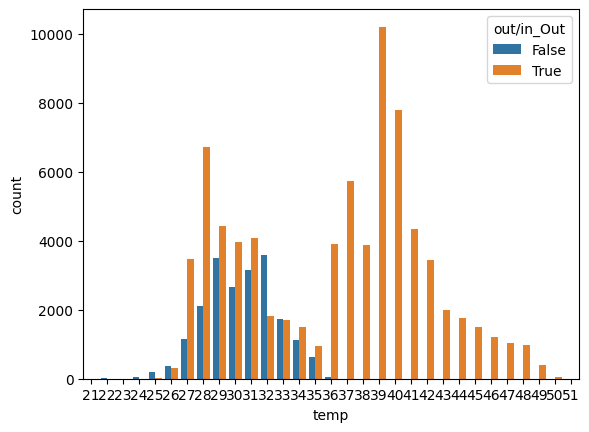

In [19]:
sb.countplot(x="temp",data=dataset,hue="out/in_Out")
plt.show()

# Analysing this box plot graph ,Temperature value present in the range of 20 to 55 and Out/in value are present in the range 0 or 1.

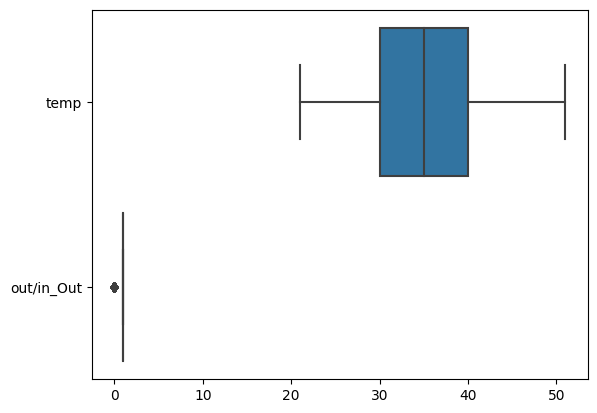

In [20]:
#boxplot-means percentile
sb.boxplot(data=dataset,orient="h")
plt.show()